# CLASSIFICATION D'IMAGES : Base de données MNIST


# Importation des bibliothèques

In [55]:
import numpy as np
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt

## Importation des données MNIST
Les données sont disponibles dans les datasets de sklearn 
On peut les recupérer avec la fonction fetch_openml

In [56]:
from sklearn.datasets import fetch_openml

# Récupération des Images
f_mnist = fetch_openml('fashion-MNIST', as_frame=False, parser="auto")
liste = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
liste[1]

'Trouser'

In [57]:
# Creation des inputs et des labels
X, y = f_mnist.data, f_mnist.target
print(X)
print(y)
print(X.shape)
print(y.shape)
# x contient n listes correspondant aux n images, contenant chacune les pixels de chaque images
# y contient n labels 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['9' '0' '0' ... '8' '1' '5']
(70000, 784)
(70000,)


8


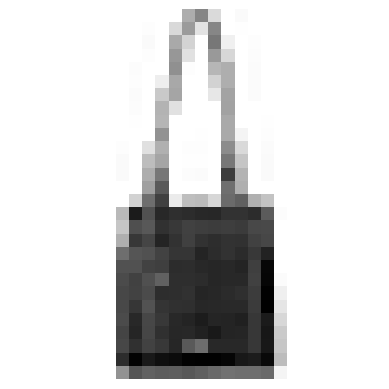

Bag


In [58]:

numero_image = 200
image = X[numero_image].reshape(28, 28)
print(y[numero_image])
plt.imshow(image, cmap="binary")
plt.axis("off")
plt.show()
print(liste[int(y[numero_image])])
#cmap="binary" permet d'voir un eimage en niveau de gris plutot qu'n couleur 
#X[numero_image].reshape(28, 28) on fait une image a partir d'une liste de chiffres entre 0 et 254 
#plt.imshow(image, cmap="binary") :> pas besoin d'un x et d'un y, on a une liste de chiffres qui correspondent aux pixels


In [59]:
# Affichage du label associé
print(y[numero_image])

8


## Création des datasets
Création des datasets d'entraintement (X_train, y_train) et de test (X_test, y_test). Par exemple, les 60000 premières images serviront à l'entrainement et les autres au test.

In [60]:
# on peut Créez les datasets : X_train, X_test, y_train et y_test de deux manières différentes : manuellement
# ou via train_test_split
import sklearn.model_selection

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train, X_test, y_train, y_test = train_test_split(X, y)
#on peut faire les deux methodes précédentes mais la 2 eme me parait mieux

# 1. Classification binaire

## Modification des datasets
On commence par la classification binaire.

In [61]:
#  création y_train5 et y_test5 pour voir binaire ( 0 si differnet de 5, 1 si ==5)
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')
print(y_test_5)

[False False False ... False  True False]


## Entrainement : modèle de régression logistique
Scikit Learn => fonction de classifieur linéaire très performante pour les gros datasets avec mise en oeuvre de la descente du gradient stochastique : SGDClassifier 
méthode de régression logistique (mais on peut en utiliser d'autres)

In [62]:
from sklearn.linear_model import SGDClassifier

# on utilise sgd_clf et on lre fit aux données pour voir si uner image est un 5 ou non
sgd_clf = SGDClassifier(loss='log_loss',random_state=42)
sgd_clf.fit(X_train, y_train_5) 
print(sgd_clf.predict(X_train[numero_image].reshape(1, -1)))
print(sgd_clf.predict_proba(X_train[numero_image].reshape(1, -1))) #probabilitéque ce soit FAUX (1) ou vrai (0)
print(sgd_clf.decision_function(X_train[numero_image].reshape(1, -1))) # tres loin de la valeur de décision donc on est sure de soi

[False]
[[1. 0.]]
[-47903.62685732]


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# on utilise sgd_clf et on lre fit aux données pour voir si uner image est un 5 ou non
rd_forest = RandomForestClassifier()
rd_forest.fit(X_train, y_train)


RandomForestClassifier()

In [64]:
print(rd_forest.predict(X_train[numero_image].reshape(1, -1)))
print(rd_forest.predict_proba(X_train[numero_image].reshape(1, -1)))

['3']
[[0.03 0.02 0.08 0.66 0.09 0.   0.08 0.   0.04 0.  ]]


## Evalution de la performance : Taux d'erreur (accuracy)


In [65]:
from sklearn.metrics import accuracy_score

# #.  on va évaluer le taux d'erreur sur le dataset d'entainement et le dataset de test

y_hat_train_5 = sgd_clf.predict(X_train)#prediction
accuracy_train = accuracy_score(y_train_5, y_hat_train_5)#supposé vs réel ???
print(accuracy_train)
y_hat_5 = sgd_clf.predict(X_test)
accuracy = accuracy_score(y_test_5, y_hat_5)
print(accuracy)

#on a des supers scores mais on aiurait  deja de bons scores si on disait toujours que c'etaient pas des 5

0.9774857142857143
0.9725142857142857


## Evalution de la performance : Matrice de Confusion

In [66]:
from sklearn.metrics import confusion_matrix

# vrais negatifs      faux négatifq 
# faux positifs       vrais positifs

# matrice de confusion
matrice_confusion = confusion_matrix(y_test_5, y_hat_5)
print(matrice_confusion)

[[15425   306]
 [  175  1594]]


## Evalution de la performance : Precision et Rappel

In [67]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test_5, y_hat_5)  
rappel = recall_score(y_test_5, y_hat_5)
print(precision)
print(rappel)

0.8389473684210527
0.9010740531373658


## Compromis Precision/Rappel

In [68]:
# Par défaut, la régression logistique avec SGDClassifier considère que si le score est négatif,respectivement positif, l'individu appartient à la classe "false", respectivement "true".
# Le seuil est donc zéro. 

seuil = 0
y_scores = sgd_clf.decision_function(X_test)
y_pred = (y_scores > seuil)
predictions_correctes = y_pred == y_test_5
print(sum(predictions_correctes))

17019


## Courbe PRECISION-RAPPEL

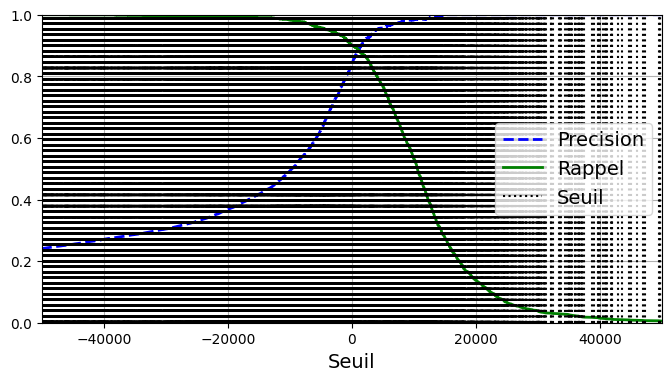

In [69]:
# La fonction precision_recall_curve calcule la precision et le rappel pour différents seuils
# possible de tracer l'évolution des la  précision (taux des faux positifs / ( vrais négatifs + faux positifs )) et du rappel (taux des vrais positifs / ( vrais positifs + faux négaitfs  en fonction du seuil

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test_5, y_scores)
plt.figure(figsize=(8, 4))  
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Rappel", linewidth=2)
plt.vlines(thresholds, 0, 1.0, "k", "dotted", label="Seuil")

plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Seuil")
plt.legend(loc="center right")
plt.show()

## Courbe ROC


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


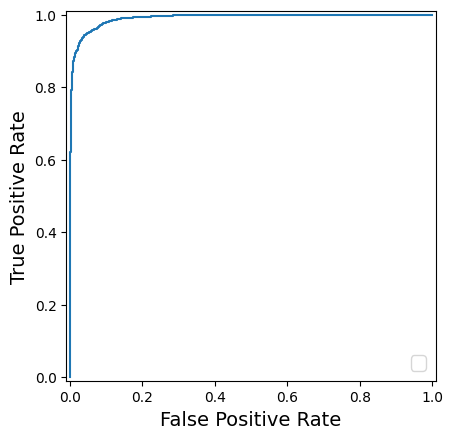

In [70]:
# courbe roc :  axe x => taux des faux positifs / ( vrais négatifs + faux positifs )   axe y => taux des vrais positifs / ( vrais positifs + faux négaitfs )

from sklearn.metrics import roc_curve, RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_test_5, y_scores)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [71]:
# Calcul AUC
from sklearn.metrics import roc_auc_score

AUC = roc_auc_score(y_test_5, y_scores)
print(AUC)

0.991110652422715


# 2. Classification Multi-classes

In [72]:
# entrainez un classifieur multi-classes avec le même algorithme rend automatiquement le bon resultat;
 
sgd_clf_MC = SGDClassifier(loss='log_loss',random_state=42)
sgd_clf_MC.fit(X_train, y_train)

SGDClassifier(loss='log_loss', random_state=42)

In [73]:
y_hat_MC = sgd_clf_MC.predict(X_test)
accuracy_MC = accuracy_score(y_test, y_hat_MC)
print(accuracy_MC)

0.8169714285714286


In [74]:
matrice_confusion_MC = confusion_matrix(y_test, y_hat_MC)
print(matrice_confusion_MC)


[[1459   13   65   44   38    1   89    0   11    1]
 [  11 1700   16   26   14    0    2    0    0    1]
 [  22    2 1250   12  376    0   41    1    5    0]
 [ 141   30   46 1379  149    0   26    0    5   15]
 [   7    0  119   39 1541    0   33    0    2    1]
 [   7    2    0    3    5 1473    9  117   71   82]
 [ 346    6  280   56  454    0  555    0   31    1]
 [   0    0    0    0    0   19    0 1632    8   72]
 [  10    0   14   14   29    3   58   10 1688    5]
 [   0    0    2    0    1   11    0   61   12 1620]]


## a la main

In [75]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]


In [76]:
X_train.shape
X_train.dtype

dtype('uint8')

In [77]:

X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]



In [78]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

c:\Users\OliviaPACE\Zalendo.test\mnist_fashion\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [79]:
# extra code – clear the session to reset the name counters
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])


c:\Users\OliviaPACE\Zalendo.test\mnist_fashion\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [80]:

model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [81]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [82]:
# extra code – this cell is equivalent to the previous cell
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])


history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.9916 - sparse_categorical_accuracy: 0.6877 - val_loss: 0.4981 - val_sparse_categorical_accuracy: 0.8304
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.5022 - sparse_categorical_accuracy: 0.8290 - val_loss: 0.4478 - val_sparse_categorical_accuracy: 0.8438
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4495 - sparse_categorical_accuracy: 0.8440 - val_loss: 0.4266 - val_sparse_categorical_accuracy: 0.8482
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.4194 - sparse_categorical_accuracy: 0.8535 - val_loss: 0.4127 - val_sparse_categorical_accuracy: 0.8554
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3976 - sparse_categorical_accuracy: 0.8608 - val_loss: 0.4021 - val_sparse_categorical_accuracy: 0.8576
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3802 - sparse_categorical_accuracy: 0.8662 - val_loss: 0.3919 - val_sparse_categorical_accuracy:

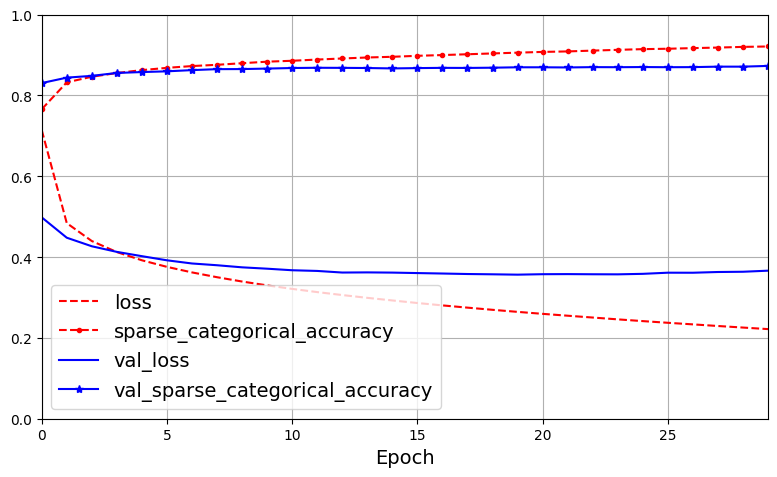

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
save_fig("keras_learning_curves_plot")  # extra code
plt.show()